In [3]:
%matplotlib inline


# Generated Data Extrapolation


In this example you will be generating some example data and extrapolate this
using the basic potential extrapolator.


You can start by importing the necessary module components.


In [5]:
# Module imports
from solarbextrapolation.map3dclasses import Map3D
#from solarbextrapolation.potential_field_extrapolator import PotentialExtrapolator
from solarbextrapolation.extrapolators import PotentialExtrapolator
from solarbextrapolation.example_data_generator import generate_example_data, dummyDataToMap
from solarbextrapolation.visualisation_functions import visualise

SyntaxError: invalid syntax (state_pickler.py, line 1210)

You also need the ability to convert astropyunits and use MayaVi for
visualisation.


In [6]:
# General imports
import astropy.units as u
from mayavi import mlab
import numpy as np

SyntaxError: invalid syntax (state_pickler.py, line 1210)

You are going to try and define a 3D cuboid grid of 20x22x20 with ranges in
arcseconds, these parameters can be stored in the following lists and astropy
quantities.


In [7]:
# Input parameters:
arr_grid_shape = [ 20, 22, 20 ]         # [ y-size, x-size ]
xrange = u.Quantity([ -10.0, 10.0 ] * u.arcsec)
yrange = u.Quantity([ -11.0, 11.0 ] * u.arcsec)
zrange = u.Quantity([ 0,     20.0 ] * u.arcsec)

The generated data will consist of a 2D space with 2 Gaussian spots, one
positive and one negative, on a background of 0.0.
solarbextrapolation.example_data_generator provides many ways to achieve this,
including letting it randomly generate the position, magnitude and size of
each spot.
In this case you will manually define the parameters of each spot as a list,
using percentage units so that the spots will be inside the given ranges of
any generated data:


In [8]:
# Manual Pole Details
#arrA# = [ position, size, maximum strength ]
arrA0 = [ u.Quantity([ 25, 25 ] * u.percent), 10.0 * u.percent,  0.2 * u.T ]
arrA1 = [ u.Quantity([ 75, 75 ] * u.percent), 10.0 * u.percent, -0.2 * u.T ]

You generate the data using generate_example_data(...) and create a map with
this using dummyDataToMap(...).


In [9]:
# Generate the data and make into a map
arr_data = generate_example_data(arr_grid_shape[0:2], xrange, yrange, arrA0, arrA1)
map_boundary = dummyDataToMap(arr_data, xrange, yrange)

You can check the resulting generated data by using peek().


('hgln_obs', 'hglt_obs', 'dsun_obs')
('crln_obs', 'crlt_obs', 'dsun_obs') [sunpy.map.mapbase]


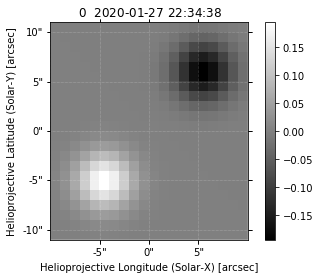

In [10]:
map_boundary.peek()

You now simply want to extrapolate using this boundary data, this is achieved
by first creating a potential extrapolator object and then by running the
extrapolate on this to return a Map3D object with the resulting vector field.


In [11]:
# Use potential extrapolator to generate field
aPotExt = PotentialExtrapolator(map_boundary, zshape=arr_grid_shape[2], zrange=zrange)
aMap3D  = aPotExt.extrapolate(enable_numba=True)

# The Extrapolations run time is stored in the meta
floSeconds = np.round(aMap3D.meta['extrapolator_duration'],3)
print('\nextrapolation duration: ' + str(floSeconds) + ' s\n')

AttributeError: 'GenericMap' object has no attribute 'xrange'

Note that you used enable_numba=True to speed up the computation on systems
with Anaconda numba installed.


You can now get a quick and easy visualisation using the
solarbextrapolation.example_data_generator.visualise tools:


In [ ]:
# Visualise the 3D vector field
fig = visualise(aMap3D,
                boundary=map_boundary,
                volume_units=[1.0*u.arcsec, 1.0*u.arcsec, 1.0*u.Mm],
                show_boundary_axes=False,
                boundary_units=[1.0*u.arcsec, 1.0*u.arcsec],
                show_volume_axes=True,
                debug=False)
mlab.show()

Note that the parameters here are simply to decide what boundary ranges
to display.
